Business Problem Understanding

# The objective is to predict whether a client would subscribe to a term deposit using the dataset related to the marketing of bank products over the telephone.
# Accurate predictions can help in targeted marketing campaigns, leading to better resource allocation and improved results.


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

Data Preparation

In [48]:
# Load the dataset
df = pd.read_csv('data/bank-full.csv')

# Display the first few rows of the dataset
print(df.head())

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Split the data into training and testing sets
y = df.iloc[:,16]

X = df.iloc[:,:-1] #drop(columns='y', axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


Descriptive and Inferential Statistics

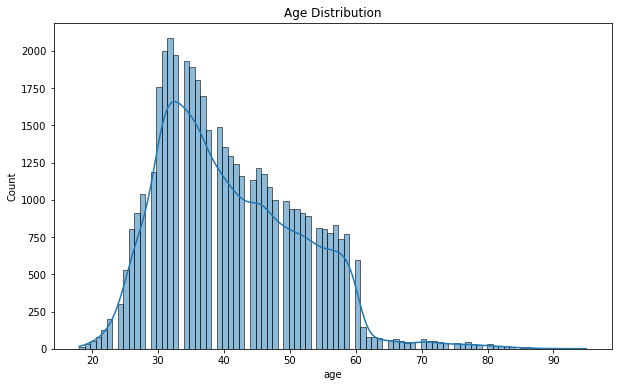

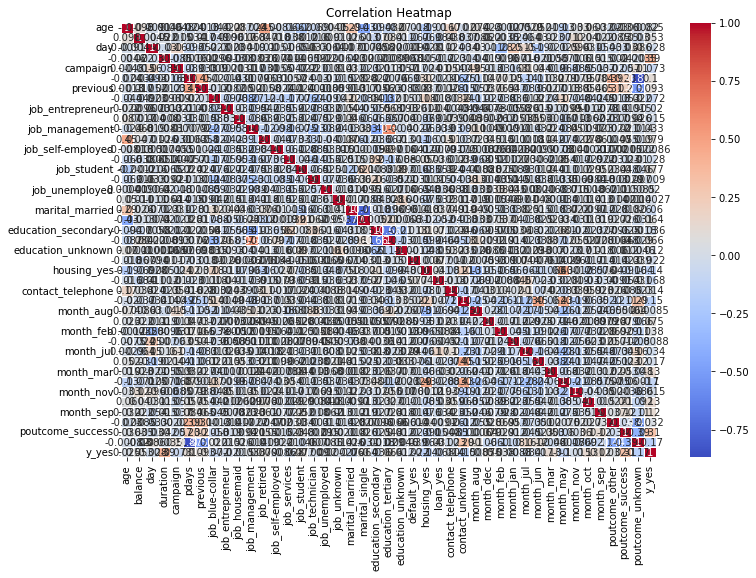

In [49]:
# Plot distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Model Building and Evaluation

In [50]:
# Initialize models
knn = KNeighborsClassifier()
log_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()
svm = SVC()

# List of models
models = [knn, log_reg, decision_tree, svm]

# Cross-validation and model evaluation
for model in models:
    model_name = model.__class__.__name__
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{model_name}:")
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}\n")


KNeighborsClassifier:
Cross-validation scores: [0.97203791 0.97203791 0.9720335  0.97171749 0.97155949]
Accuracy: 0.9690356826894722, Precision: 0.0, Recall: 0.0, F1-Score: 0.0



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression:
Cross-validation scores: [1. 1. 1. 1. 1.]
Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1-Score: 1.0

DecisionTreeClassifier:
Cross-validation scores: [1. 1. 1. 1. 1.]
Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1-Score: 1.0

SVC:
Cross-validation scores: [0.97203791 0.97203791 0.9720335  0.9720335  0.9720335 ]
Accuracy: 0.9691831318195223, Precision: 0.0, Recall: 0.0, F1-Score: 0.0



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
